In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def ackley(x):
    d = len(x)
    a = 20
    b = 0.2
    c = 2 * np.pi
    first_sum = np.sum(np.square(x))
    second_sum = np.sum(np.cos(np.multiply(c, x)))
    return -a*np.exp(-b*np.sqrt(first_sum / d)) - np.exp(second_sum / d) + a + np.exp(1)

In [3]:
n = 5
bounds = [(-32, 32) for _ in range(n)]

Koristeći optimizaciju rojem čestica (PSO) minimizovati Aklijevu funkciju na datom opsegu.

Napraviti klasu $Particle$ koja predstavlja jednu česticu i ima metode $updatePosition$ i $updateVelocity$ koji ažuriraju poziciju i brzinu čestice.

Za parametre $w$, $c1$ i $c2$ uzeti redom vrednosti $0.75$, $1$ i $2$.

In [4]:
class Particle:

    def __init__(self, objective, bounds, w, c1, c2):
        self.position = []
        self.velocity = []

        self.lower_bounds = bounds[0][0]
        self.upper_bounds = bounds[0][1]

        self.position.append(np.random.uniform(self.lower_bounds, self.upper_bounds, len(bounds)))
        self.velocity.append(np.random.uniform(-1, 1, len(bounds)))

        self.bestPosition = list(self.position)
        self.currentValue = objective(self.position)
        self.bestValue = objective(self.bestPosition)

        self.objective = objective
        self.bounds = bounds
        self.w = w
        self.c1 = c1
        self.c2 = c2

    def updatePosition(self, globalBestPosition, globalBestValue):
        self.position.append(np.clip(self.position[-1] + self.velocity[-1], self.lower_bounds, self.upper_bounds))
        self.value = self.objective(self.position[-1])

        if self.value < self.bestValue:
            self.bestPosition.append(self.position[-1])
            self.bestValue = self.value
            if not globalBestPosition or not globalBestValue or globalBestValue[-1] > self.value:
                globalBestPosition.append(self.position[-1])
                globalBestValue.append(self.value)
            else:
                globalBestPosition.append(globalBestPosition[-1])

    def updateVelocity(self, globalBestPosition):
        if not globalBestPosition:
            globalBestPosition.append(self.bestPosition)
        else:
            cognitive_velocity = self.bestPosition[-1] - self.position[-1]
            social_velocity = globalBestPosition[-1][-1] - self.position[-1]

            rp = np.random.random(len(cognitive_velocity))
            rs = np.random.random(len(social_velocity))

            self.velocity.append(
                self.w * self.velocity[-1] + self.c1 * rp * cognitive_velocity + self.c2 * rs * social_velocity)

Napisati funkciju $pso$ koja pravi roj od $numParticles$ čestica i vrši optimizaciju.

Uslov zaustavljanja je broj iteracija $iters$.

Nacrtati grafik promene vrednosti najboljeg rešenja kroz iteracije.

Iz funkcije vratiti poziciju i vrednost najboljeg rešenja.

In [5]:
def pso(numParticles, iters):
    globalBestPosition = []
    globalBestValue = []

    swarm = [Particle(ackley, bounds, 0.75, 1, 2) for _ in range(numParticles)]

    for i in range(iters):
        for s in swarm:
            s.updateVelocity(globalBestPosition)
            s.updatePosition(globalBestPosition, globalBestValue)

    plt.plot(globalBestValue)
    plt.show()
    
    return globalBestPosition[-1], globalBestValue[-1]


Minimum ove funkcije je nula i dostiže se u nuli.

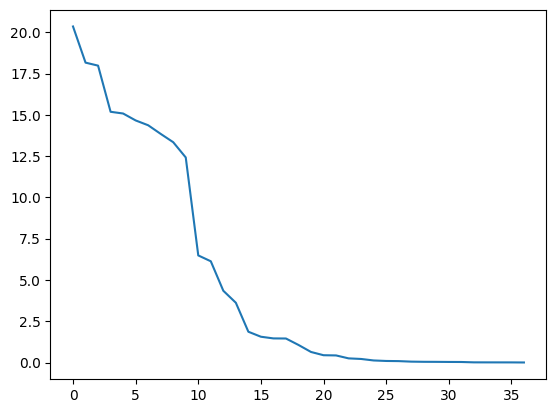

(array([ 0.00058092, -0.00119948, -0.00062814, -0.00140422, -0.00111831]),
 0.004211760690534749)

In [6]:
pso(25, 300)